#### Questions: 
<ol>
    <li> Upload the data at "http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/fruits.csv" into a DataFrame. Then
    use LabelEncoder to convert fruit_name column from categorical to numerical data. Print out all the fruit names that are in the data.
        </li><li>
    Create a dictionary to convert from numerical value back to name of fruit.
    </li><li>
    Create X to be a DataFrame with the height and width columns. Create Y with the numerical data from fruit_name column. 
    </li><li>
    Split your data into training and testing data use "random_state=0". (with train_test_split)
    </li><li>
    Perform k nearest neighbors classification, with all ODD values from 1-43 as neighbors. (44 should be the length of your training set). Make predictions for fruit points in X_sample=np.array([[7.5,7.5],[9.2,7.2],[4.3,5.9],[7.5, 7.1]]) Use your dictionary to output the name of the fruit and not the value. E.g. it should print "apple" and not 0. 
    Explain what is happening as k increases by analyzing your data.
    </li><li>
    Perform k nearest neighbors classification, with all odd values from 1-43 as neighbors. Record the scores on the training and testing data and plot them on the same graph. 
    Which number of neighbors seems best for this data?
            </li><li> When is overfitting (high variance) occurring in your model? When is underfitting (high bias) occurring in your model?
      </li><li> Graph the decision boundaries for 1,3,5 neighbors. 
    </li><li> Graph the decision boundaries for 19,29, and 43 neighbors. 
    </li><li> Explain how you see the overfitting and underfitting in the decision boundaries. 
     </li><li> Repeat problems 5 and 6 but redo your train_test_split to use "random_state=5".  How did your performance change and why? Justify your answer based on your data. 
         </li><li> Repeat problem 6 but with X= height,mass, width and color_score columns  How did your performance change?
</li>  
</ol>    


In [1]:
import numpy as np
import sklearn as sk
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from statistics import mean

In [2]:
#Read data from URL and put it into a dataframe
URL = 'http://facweb1.redlands.edu/fac/Tamara_Veenstra/ML/fruits.csv'
df = pd.read_csv(URL)
df.head()

,Unnamed: 0,fruit_name,fruit_subtype,height,mass,width,color_score
0,0,apple,granny_smith,7.3,192,8.4,0.55
1,1,apple,granny_smith,6.8,180,8.0,0.59
2,2,apple,granny_smith,7.2,176,7.4,0.60
3,3,mandarin,mandarin,4.7,86,6.2,0.80
4,4,mandarin,mandarin,4.6,84,6.0,0.79


In [3]:
#label encoder initialized in order to convert fruit_name categories to numerical data
LE=LabelEncoder()
LE.fit(df['fruit_name'])
#list out each type of fruit_name
list(LE.classes_)

['apple', 'lemon', 'mandarin', 'orange']

In [4]:
#Add a column with the new numerical data aqcuired from label encoder
df['fruit_value'] = LE.transform(df['fruit_name'])
df.head()

,Unnamed: 0,fruit_name,fruit_subtype,height,mass,width,color_score,fruit_value
0,0,apple,granny_smith,7.3,192,8.4,0.55,0
1,1,apple,granny_smith,6.8,180,8.0,0.59,0
2,2,apple,granny_smith,7.2,176,7.4,0.60,0
3,3,mandarin,mandarin,4.7,86,6.2,0.80,2
4,4,mandarin,mandarin,4.6,84,6.0,0.79,2


In [5]:
#Create x with the 1st column for height data, and the 2nd for width data
x = df[['height', 'width']].to_numpy()

#Create y with the new numerical data from before, or in this case, called fruit_value
y = df['fruit_value'].values
print(x.shape, y.shape)

(59, 2) (59,)


In [6]:
#Split x and y data into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0)
print(x_train.shape, x_test.shape, y_train.shape, y_test.shape)

(44, 2) (15, 2) (44,) (15,)


In [7]:
#Create a for loop for the size of the training data
for i in range(44):
    
    #Only deal with odd values as we only want to test for odd k values
    if i%2 != 0:
        
        #Create k classifier function with k = i
        knn = KNeighborsClassifier(n_neighbors = i)
        
        #apply classifier function to x and y training data
        knn.fit(x_train, y_train)
        
        #Implement sample data, and make a prediction
        X_sample=np.array([[7.5,7.5],[9.2,7.2],[4.3,5.9],[7.5, 7.1]])
        l = knn.predict(X_sample)
        
        print("k={} Train".format(i),knn.score(x_train, y_train))
        print("k={} Test".format(i),knn.score(x_test, y_test))
        print('Prediction:', LE.inverse_transform(l))
        print('\n')

k=1 Train 1.0
k=1 Test 0.5333333333333333
Prediction: ['apple' 'lemon' 'mandarin' 'orange']


k=3 Train 0.8863636363636364
k=3 Test 0.6666666666666666
Prediction: ['apple' 'lemon' 'mandarin' 'orange']


k=5 Train 0.8409090909090909
k=5 Test 0.6
Prediction: ['apple' 'lemon' 'mandarin' 'orange']


k=7 Train 0.8409090909090909
k=7 Test 0.6
Prediction: ['apple' 'lemon' 'mandarin' 'orange']


k=9 Train 0.8181818181818182
k=9 Test 0.6
Prediction: ['apple' 'lemon' 'mandarin' 'orange']


k=11 Train 0.7727272727272727
k=11 Test 0.5333333333333333
Prediction: ['apple' 'lemon' 'mandarin' 'orange']


k=13 Train 0.7045454545454546
k=13 Test 0.3333333333333333
Prediction: ['apple' 'lemon' 'apple' 'apple']


k=15 Train 0.6590909090909091
k=15 Test 0.4
Prediction: ['apple' 'lemon' 'apple' 'apple']


k=17 Train 0.6590909090909091
k=17 Test 0.4
Prediction: ['apple' 'lemon' 'apple' 'apple']


k=19 Train 0.6590909090909091
k=19 Test 0.4
Prediction: ['apple' 'lemon' 'apple' 'apple']


k=21 Train 0.65909090

As k increases in this sample, the reliability of prediction begins to decrease. When k = 3,5,7 is where the scores for both the testing and training data are closest to 1. Also, when looking at X_sample, the prediction point are quite distinct from each other, which is shown after the prediction is made as each fruit name is listead. But as k in crease, the score of the data moves farther away from 1 and all the prediction points are starting to become 'apple', eventually till the whole prediction is apple at k=39,41,43.

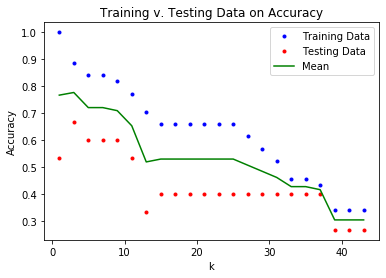

In [8]:
#Create arrays for accuracy data for traing and testing data, along with their mean
scoresTrain = []
scoresTest = []
mean = []

#Same process as previous cell, but added the scores to lists
for i in range(44):
    if i%2 != 0:
        knn = KNeighborsClassifier(n_neighbors = i)
        knn.fit(x_train, y_train)
        scoresTrain.append(knn.score(x_train, y_train))
        scoresTest.append(knn.score(x_test, y_test))
        
        #Takes the mean of the scores between both sets (Just something to help me visualize the difference between both)
        m = (knn.score(x_train, y_train) + knn.score(x_test, y_test)) / 2
        mean.append(m)

#Takes the lists for training and testing scores, as well as the mean of the scores
plt.plot(range(1,45,2),scoresTrain, 'b.', label = 'Training Data')
plt.plot(range(1,45,2),scoresTest, 'r.', label = 'Testing Data')
plt.plot(range(1,45,2),mean, 'g-', label = 'Mean')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training v. Testing Data on Accuracy')
plt.legend()
plt.show()

Based on the graph and an extra line measuring the mean between each training and testing point at each k. It appears that the best k is k=3 since the mean of both points has the highest accuracy.

Overfitting defintily occurs as k=1 since the accuracy for the training data is 100%, while the testing is almost only 50%, but as k increases, variance begins to decrease. But When we get to k = 13, variance shoots up fast. But as it continues to increase, underfitting becomes more prevalent as training data is getting closer to testing data, but at the cost of a lower accuracy.

In [9]:
#Create function for future graphing
def decision_graph(X1,X2,y1,y2,k):
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X1, y1)
   
    #Create x and y data
    x0, x1 = np.meshgrid(
        np.linspace(3.75, 11, 500).reshape(-1, 1),
        np.linspace(5, 10, 200).reshape(-1, 1),
        )
    X_new = np.c_[x0.ravel(), x1.ravel()]

    #Make a prediction based on the newly created data
    y_predict = knn.predict(X_new)

    #Reshape that prediction so it has the same shape as or x data
    zz = y_predict.reshape(x0.shape)

    plt.figure(figsize=(10, 10))
    #Plot data from training and testing data
    plt.plot(X1[y1==0, 0], X1[y1==0, 1], "ro", label="apple train")
    plt.plot(X1[y1==1, 0], X1[y1==1, 1], "yP", label="lemon train")
    plt.plot(X1[y1==2, 0], X1[y1==2, 1], "ms", label="mandarin train")
    plt.plot(X1[y1==3, 0], X1[y1==3, 1], "cD", label="orange train")

    plt.plot(X2[y2==0, 0], X2[y2==0, 1], "rx", label="apple test")
    plt.plot(X2[y2==1, 0], X2[y2==1, 1], "yx", label="lemon test")
    plt.plot(X2[y2==2, 0], X2[y2==2, 1], "mx", label="mandarin test")
    plt.plot(X2[y2==3, 0], X2[y2==3, 1], "cx", label="orange test")

    #create areas of color to signify classification
    from matplotlib.colors import ListedColormap
    custom_cmap = ListedColormap(['pink','moccasin','violet', 'skyblue'])

    plt.contourf(x0, x1, zz, cmap=custom_cmap)
    plt.xlabel("Height")
    plt.ylabel("Width")
    plt.legend(loc="upper left", fontsize=12)
    plt.title("Decision Boundary if k={}".format(k), fontsize = 14)
    
    return plt.show(), knn.predict(x_test)


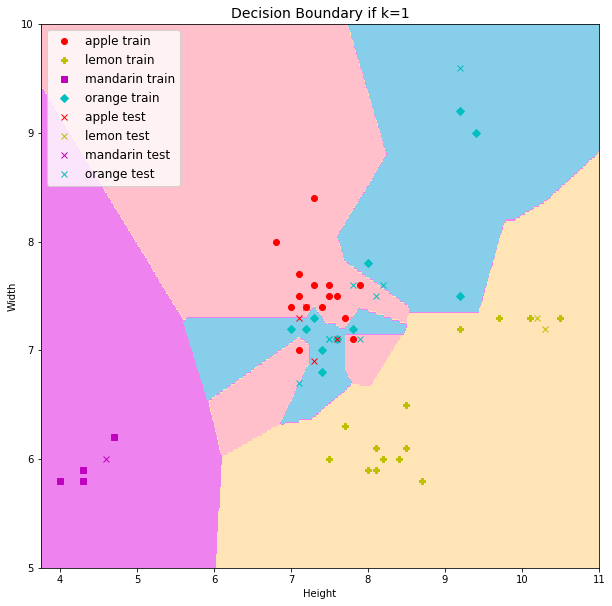

(None, array([3, 0, 1, 0, 3, 0, 0, 1, 3, 3, 2, 3, 3, 3, 0]))

In [10]:
decision_graph(x_train,x_test,y_train,y_test,1)

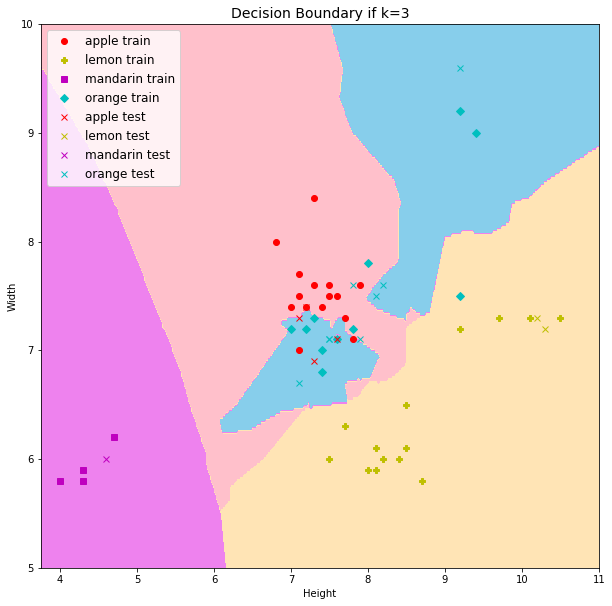

(None, array([3, 0, 1, 3, 3, 0, 0, 1, 3, 3, 2, 3, 3, 3, 3]))

In [11]:
decision_graph(x_train,x_test,y_train,y_test,3)

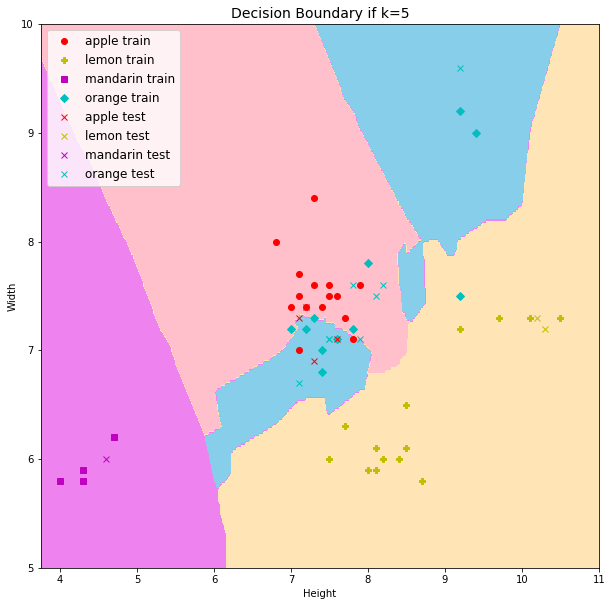

(None, array([3, 0, 1, 3, 3, 0, 0, 1, 3, 0, 2, 3, 3, 0, 0]))

In [12]:
decision_graph(x_train,x_test,y_train,y_test,5)

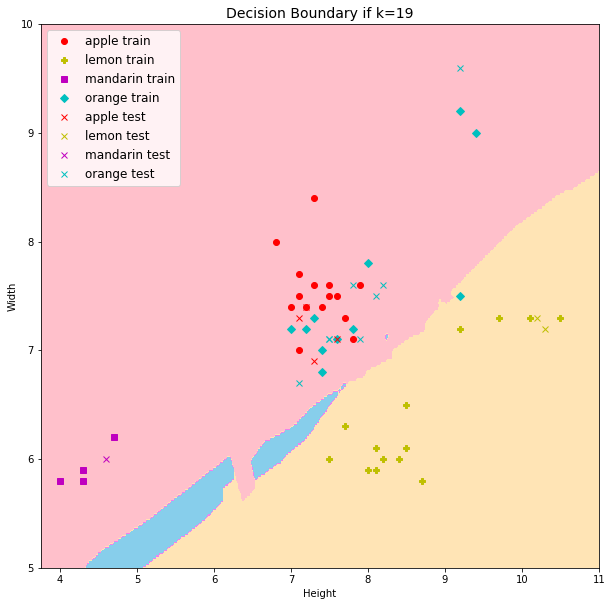

(None, array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))

In [13]:
decision_graph(x_train,x_test,y_train,y_test,19)

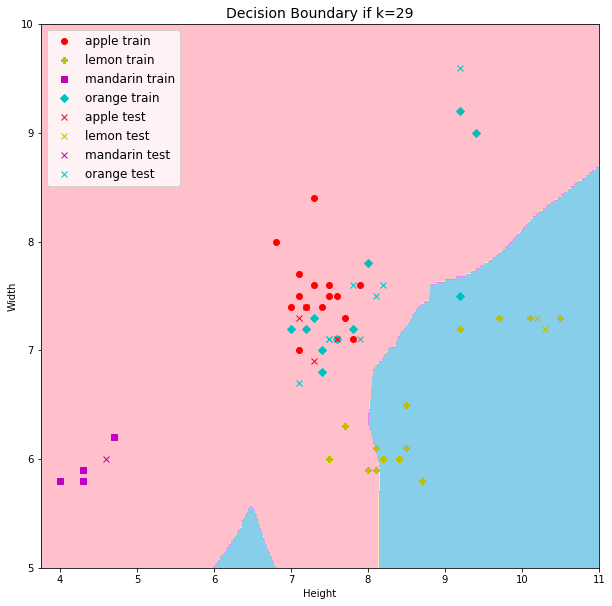

(None, array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0]))

In [14]:
decision_graph(x_train,x_test,y_train,y_test,29)

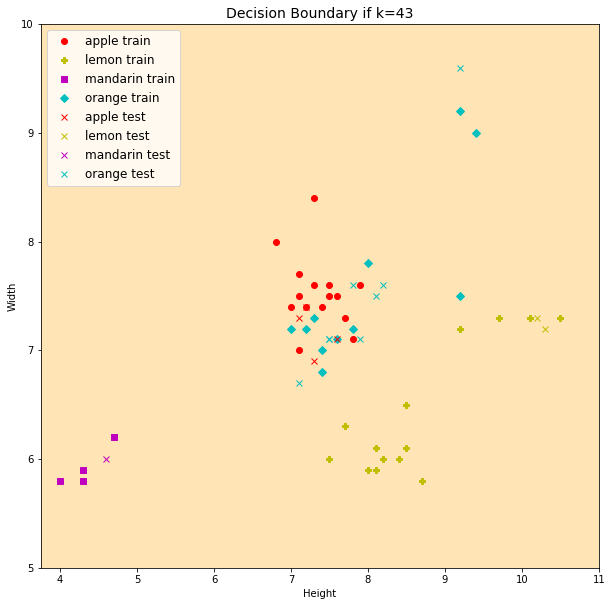

(None, array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [15]:
decision_graph(x_train,x_test,y_train,y_test,43)

In [22]:
#Testing scores for all k values, but in this case, only changing the random_state = 5
x_train2, x_test2, y_train2, y_test2 = train_test_split(x, y, random_state=5)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

scoresTrain2 = []
scoresTest2 = []
mean2 = []

for i in range(44):
    if i%2 != 0:
        knn2 = KNeighborsClassifier(n_neighbors = i)
        knn2.fit(x_train2, y_train2)
        X_sample=np.array([[7.5,7.5],[9.2,7.2],[4.3,5.9],[7.5, 7.1]])
        l2 = knn2.predict(X_sample)
        
        scoresTrain2.append(knn2.score(x_train2, y_train2))
        scoresTest2.append(knn2.score(x_test2, y_test2))
        m2 = (knn2.score(x_train2, y_train2) + knn2.score(x_test2, y_test2)) / 2
        mean2.append(m2)
        
        print("k={} Train".format(i),knn2.score(x_train2, y_train2))
        print("k={} Test".format(i),knn2.score(x_test2, y_test2))
        print('Prediction:', LE.inverse_transform(l2))
        print('\n')

AttributeError: 'numpy.ndarray' object has no attribute 'count'

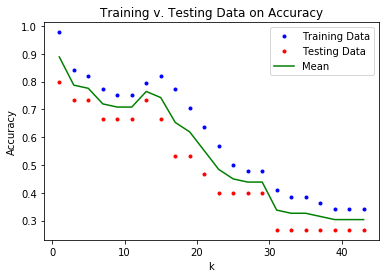

[[ 7.2  7.2  7.5  7.1]
 [10.1  7.3  7.2  7.4]
 [ 4.   5.8  7.4  7. ]
 [ 7.3  7.6  8.1  6.1]
 [ 7.   7.2  9.4  9. ]
 [ 8.7  5.8  4.6  6. ]
 [ 7.4  7.   9.2  9.2]
 [ 7.3  7.3  7.3  8.4]
 [ 8.1  5.9  4.3  5.8]
 [ 7.1  7.5  8.5  6.5]
 [ 7.7  6.3  8.2  7.6]
 [ 9.2  7.5  9.2  7.2]
 [ 7.1  7.7  8.1  7.5]
 [ 4.3  5.8  7.3  7.3]
 [ 8.   7.8  8.2  6. ]
 [ 7.5  7.6  7.   7.2]
 [ 8.2  6.   7.3  6.9]
 [ 7.5  7.5  8.   5.9]
 [ 7.5  6.   7.1  7.5]
 [ 7.8  7.1  7.1  7.3]
 [ 7.7  7.3  7.5  7.5]
 [ 9.2  9.2  8.1  5.9]
 [ 7.6  7.5  6.8  8. ]
 [ 8.1  6.1  7.6  7.1]
 [ 8.5  6.5  7.7  7.3]
 [ 8.   5.9 10.1  7.3]
 [ 7.8  7.2 10.2  7.3]
 [ 6.8  8.   8.7  5.8]
 [ 7.1  7.   7.1  7.7]
 [ 9.2  7.2  7.1  7. ]
 [ 9.4  9.   4.   5.8]
 [ 4.3  5.9  8.4  6. ]
 [ 7.9  7.6  7.5  7.1]
 [ 7.6  7.1  9.2  7.5]
 [ 7.4  7.4  7.4  6.8]
 [ 7.2  7.4  7.6  7.1]
 [ 7.   7.4  7.8  7.1]
 [ 7.4  6.8  7.   7.4]
 [ 8.5  6.1  7.5  7.6]
 [ 4.7  6.2  8.5  6.1]
 [ 7.3  8.4  7.8  7.2]
 [ 8.4  6.   9.7  7.3]
 [ 9.7  7.3  7.3  7.6]
 [10.5  7.3

In [17]:
#Ploting that data taken from last cell, where random_state = 5, and plotting it
plt.plot(range(1,45,2),scoresTrain2, 'b.', label = 'Training Data')
plt.plot(range(1,45,2),scoresTest2, 'r.', label = 'Testing Data')
plt.plot(range(1,45,2),mean2, 'g-', label = 'Mean')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training v. Testing Data on Accuracy')
plt.legend()
plt.show()

#Just examing what each data set between training of different random states differ
testx = np.hstack((x_train,x_train2))
print(testx)

So when I change the random_state to 5, the distribution of training and data point was a lot nicer in that they were closer together, which is what we intend to do in order to have a high accuracy between both sets. The data is being pulled from the same sources for both split methods, however, what the randomization is for 0 in selecting the points is very different from what 5 is selecting. In the case of 5, the variance throughout the graph is quite low, which is definetly something to strive for, but as we get into k=20, bias really begins to rise. But compared to random state 0, the variance was definetly a lot lower in the lower k values compared to random state 0.

In [18]:
#Same process, just adding to extra features to x, with random state 0
x_new = df[['height', 'mass', 'width', 'color_score']].to_numpy()
y_new = y = df['fruit_value'].values
print(x_new.shape,y_new.shape)

x_trainN, x_testN, y_trainN, y_testN = train_test_split(x_new, y_new, random_state=0)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

scoresTrainN = []
scoresTestN = []
meanN = []

for i in range(44):
    if i%2 != 0:
        knnN = KNeighborsClassifier(n_neighbors = i)
        knnN.fit(x_trainN, y_trainN)
        
        scoresTrainN.append(knnN.score(x_trainN, y_trainN))
        scoresTestN.append(knnN.score(x_testN, y_testN))
        mN = (knnN.score(x_trainN, y_trainN) + knnN.score(x_testN, y_testN)) / 2
        meanN.append(mN)
        
        print("k={} Train".format(i),knnN.score(x_trainN, y_trainN))
        print("k={} Test".format(i),knnN.score(x_testN, y_testN))
        print('\n')

(59, 4) (59,)
(44, 2) (15, 2) (44,) (15,)
k=1 Train 1.0
k=1 Test 0.6


k=3 Train 0.8181818181818182
k=3 Test 0.5333333333333333


k=5 Train 0.7727272727272727
k=5 Test 0.5333333333333333


k=7 Train 0.75
k=7 Test 0.5333333333333333


k=9 Train 0.6363636363636364
k=9 Test 0.5333333333333333


k=11 Train 0.5454545454545454
k=11 Test 0.26666666666666666


k=13 Train 0.5454545454545454
k=13 Test 0.26666666666666666


k=15 Train 0.5454545454545454
k=15 Test 0.26666666666666666


k=17 Train 0.5454545454545454
k=17 Test 0.26666666666666666


k=19 Train 0.5454545454545454
k=19 Test 0.26666666666666666


k=21 Train 0.5454545454545454
k=21 Test 0.26666666666666666


k=23 Train 0.5454545454545454
k=23 Test 0.26666666666666666


k=25 Train 0.5454545454545454
k=25 Test 0.26666666666666666


k=27 Train 0.5
k=27 Test 0.26666666666666666


k=29 Train 0.5
k=29 Test 0.26666666666666666


k=31 Train 0.3409090909090909
k=31 Test 0.26666666666666666


k=33 Train 0.3409090909090909
k=33 Test 0.2666666666666

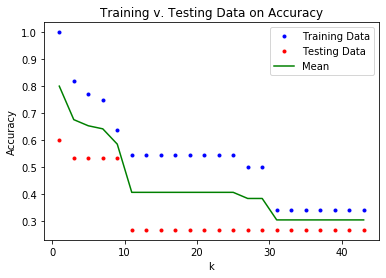

In [19]:
#Plot data from previuous cell
plt.plot(range(1,45,2),scoresTrainN, 'b.', label = 'Training Data')
plt.plot(range(1,45,2),scoresTestN, 'r.', label = 'Testing Data')
plt.plot(range(1,45,2),meanN, 'g-', label = 'Mean')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training v. Testing Data on Accuracy')
plt.legend()
plt.show()

(59, 4) (59,)
(44, 2) (15, 2) (44,) (15,)
k=1 Train 1.0
k=1 Test 0.8666666666666667


k=3 Train 0.75
k=3 Test 0.7333333333333333


k=5 Train 0.6818181818181818
k=5 Test 0.6


k=7 Train 0.5454545454545454
k=7 Test 0.4666666666666667


k=9 Train 0.6136363636363636
k=9 Test 0.4666666666666667


k=11 Train 0.5909090909090909
k=11 Test 0.4666666666666667


k=13 Train 0.6136363636363636
k=13 Test 0.5333333333333333


k=15 Train 0.4772727272727273
k=15 Test 0.5333333333333333


k=17 Train 0.5227272727272727
k=17 Test 0.6


k=19 Train 0.5
k=19 Test 0.4666666666666667


k=21 Train 0.4772727272727273
k=21 Test 0.5333333333333333


k=23 Train 0.4772727272727273
k=23 Test 0.4666666666666667


k=25 Train 0.4318181818181818
k=25 Test 0.4666666666666667


k=27 Train 0.3409090909090909
k=27 Test 0.26666666666666666


k=29 Train 0.3409090909090909
k=29 Test 0.26666666666666666


k=31 Train 0.3409090909090909
k=31 Test 0.26666666666666666


k=33 Train 0.3409090909090909
k=33 Test 0.26666666666666666


k

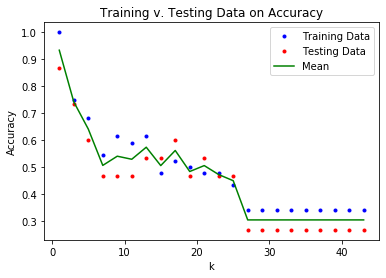

In [20]:
#Same process, just adding to extra features to x, with random state 5

x_new = df[['height', 'mass', 'width', 'color_score']].to_numpy()
y_new = y = df['fruit_value'].values
print(x_new.shape,y_new.shape)

x_trainN, x_testN, y_trainN, y_testN = train_test_split(x_new, y_new, random_state=5)
print(x_train2.shape, x_test2.shape, y_train2.shape, y_test2.shape)

scoresTrainN = []
scoresTestN = []
meanN = []

for i in range(44):
    if i%2 != 0:
        knnN = KNeighborsClassifier(n_neighbors = i)
        knnN.fit(x_trainN, y_trainN)
        
        scoresTrainN.append(knnN.score(x_trainN, y_trainN))
        scoresTestN.append(knnN.score(x_testN, y_testN))
        mN = (knnN.score(x_trainN, y_trainN) + knnN.score(x_testN, y_testN)) / 2
        meanN.append(mN)
        
        print("k={} Train".format(i),knnN.score(x_trainN, y_trainN))
        print("k={} Test".format(i),knnN.score(x_testN, y_testN))
        print('\n')
        
plt.plot(range(1,45,2),scoresTrainN, 'b.', label = 'Training Data')
plt.plot(range(1,45,2),scoresTestN, 'r.', label = 'Testing Data')
plt.plot(range(1,45,2),meanN, 'g-', label = 'Mean')
plt.xlabel('k')
plt.ylabel('Accuracy')
plt.title('Training v. Testing Data on Accuracy')
plt.legend()
plt.show()

In adding the two extra features, I tested with both random states again, and found that 5 brough the lowest variance from the data. But besides that, the accuracy definetly has increased in the lower k's with the addition of more features. I mean, at k=3, the accuracy between training and testing data are very close and relatively high, at around 74%, which is fantastics. However, one thing that is definetly strange in random state 5 is that there are a few cases when the traing data accuracy is lower than the testing data, which is strange since we typically try to account for overfitting.